In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
cq1 = df.chol.quantile(0.25)
cq3 = df.chol.quantile(0.75)
cIQR = q3 - q1
lower_limit = cq1 - 1.5 * cIQR
upper_limit = cq3 + 1.5 * cIQR
print("Lower limit for outliers in the column chol is " + str(lower_limit))
print("Upper limit for outliers in the column chol is " + str(upper_limit))

NameError: name 'q3' is not defined

In [4]:
df=df[df["chol"] < upper_limit]
sns.boxplot(df["chol"])

NameError: name 'upper_limit' is not defined

/projects/789aa3e5-de8c-43a9-9498-6199f18e94f7/miniconda3/envs/ds_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='chol'>

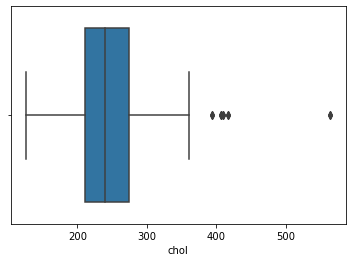

In [5]:
sns.boxplot(df["chol"])

In [6]:
q1 = df.trestbps.quantile(0.25)
q3 = df.trestbps.quantile(0.75)
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
upper_limit = q3 + 1.5 * IQR
df=df[df["trestbps"] < upper_limit]

In [7]:
q1 = df.thalach.quantile(0.25)
q3 = df.thalach.quantile(0.75)
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
df=df[df["thalach"] > lower_limit]

In [8]:
oldpeak_q1 = df.oldpeak.quantile(0.25)
oldpeak_q3 = df.oldpeak.quantile(0.75)
oldpeak_IQR = oldpeak_q3 - oldpeak_q1
oldpeak_lower_limit = oldpeak_q1 - 1.5 * oldpeak_IQR
oldpeak_upper_limit = oldpeak_q3 + 1.5 * oldpeak_IQR
df=df[df["oldpeak"] < oldpeak_upper_limit]

In [9]:
df.head()



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [11]:
y = df["target"]
x = df.drop("target", axis = 1)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [13]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
Regr = LogisticRegression(max_iter= 500)

In [16]:
Regr.fit(x_train,y_train)

LogisticRegression(max_iter=500)

In [17]:
yRegr_hat= Regr.predict(x_test)
yRegr_hat

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0])

In [18]:
np.array(y_test)

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1])

In [19]:
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

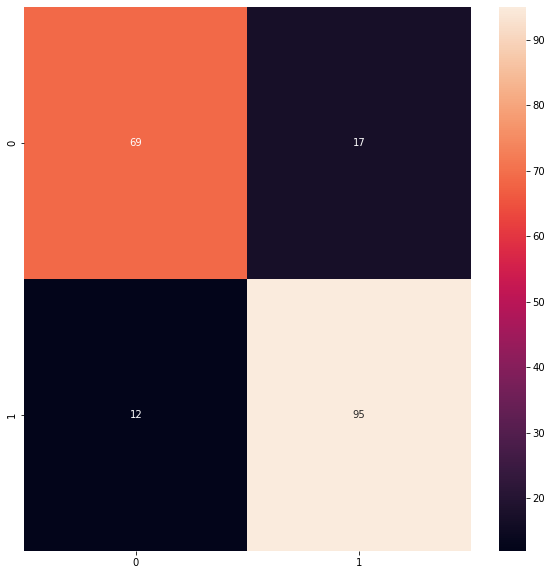

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test,yRegr_hat), annot= True, fmt = 'g')

In [21]:
#Score
scoreRegr = Regr.score(x_test,y_test)
print(scoreRegr)

0.8497409326424871


In [22]:
#Mean Squared Error
total_squared_error = (np.sum((y_test - yRegr_hat)**2))
mean_squared_error = total_squared_error/len(y_test)
print(mean_squared_error)

0.15025906735751296


In [23]:
#precison  TP/TP+FP
precision = 69/(69+17)
print(precision)

0.8023255813953488


In [24]:
#recall TP/TP+FN
recall = 69/(69+12)
print(recall)

0.8518518518518519


In [25]:
#F1 (2 x precision x recall) / (precision + recall)

(2*precision*recall)/(precision +recall)

0.8263473053892216

In [26]:
#accuracy (TP+TN)/(TP+FN+TN+FP)

(69+95)/(69+95+12+17)

0.8497409326424871

<AxesSubplot:>

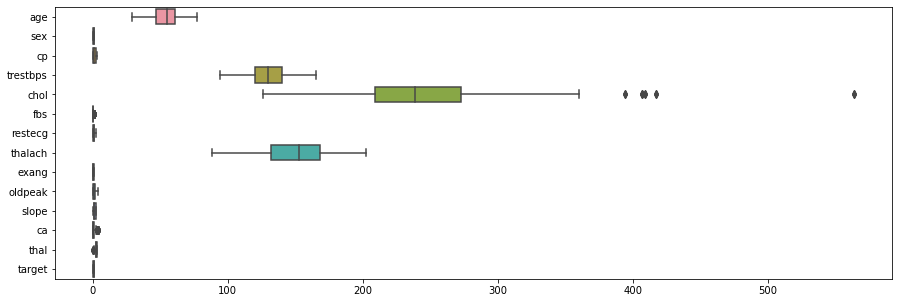

In [27]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df,orient='h')